<a href="https://colab.research.google.com/github/MikeIV2007/DS_HW_03/blob/main/DS_HW_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Домашнє завдання 03**

1. Напишіть функцію гіпотези лінійної регресії у векторному вигляді;


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def hyp(W, X):
    H = np.dot(X, W).reshape(-1, 1)
    return H

2. Cтворіть функцію для обчислення функції втрат у векторному вигляді;

In [3]:
def loss_function(X, Y, W):

    m = len(Y)
    H = hyp(W, X)
    J = (1 / (2 * m)) * np.dot((H - Y).T, (H - Y))
    return J[0][0]

3. Реалізуйте один крок градієнтного спуску;

In [4]:
def gradient_descent_step(X, Y, W, learning_rate):
    m = len(Y)
    H = hyp(W, X)

    gradient = np.dot(X.T, (H - Y)) / m
    W = W - learning_rate * gradient
    return W

4. знайдіть найкращі параметри $\vec{w}$ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab_data/Housing.csv')
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df["ones"] = 1
X = df[["ones", "area", "bathrooms", "bedrooms" ]].values

Y = df[["price"]].values

w_0 = 1
w_1 = 1
w_2 = 1
w_3 = 1
W = np.array([w_0, w_1, w_2, w_3]).reshape(-1, 1)

learning_rate = 0.0000000001
number_of_iterations = 10000
epsilon = 1000

In [7]:
def find_optimal_weights(X,Y,W, learning_rate, number_of_iterations, epsilon):
    cost_history = []
    for i in range(number_of_iterations):
        new_W = gradient_descent_step(X, Y, W, learning_rate)
        cost = loss_function(X, Y, W)
        W = new_W
        if len(cost_history)>0 and abs(cost - cost_history[-1]) < epsilon:
            print (f"loss function :{cost}")
            print (f"\nWeights:\n{W}")
            break
        cost_history.append(cost)
    return cost_history, W

In [8]:
cost_history, W = find_optimal_weights(X,Y,W, learning_rate, number_of_iterations, epsilon)

loss function :1673378175566.454

Weights:
[[  1.24660293]
 [855.62182396]
 [  1.41263248]
 [  1.82525113]]


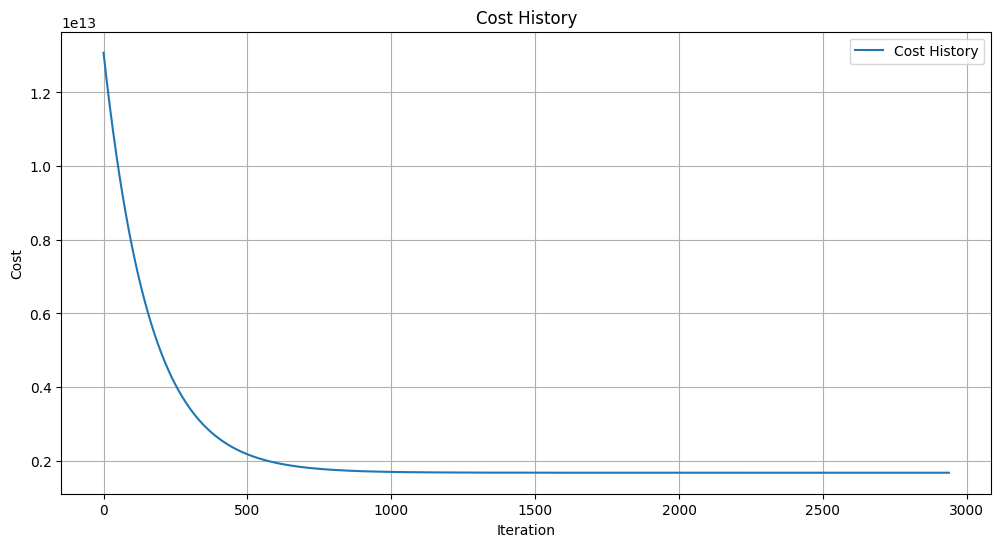

In [9]:
plt.figure(figsize=(12, 6))

plt.plot(cost_history, label='Cost History')
plt.title('Cost History')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()

plt.grid()
plt.show()

5. Знайдіть ці ж параметри за допомогою аналітичного рішення;

In [10]:
df["ones"] = 1
X = df[["ones", "area", "bathrooms", "bedrooms" ]].values

Y = df[["price"]].values

w_0 = 0
w_1 = 0
w_2 = 0
w_3 = 0

W = np.array([w_0, w_1, w_2, w_3]).reshape(-1, 1)

learning_rate = 0.00000000001
number_of_iterations = 100000
epsilon = 100

In [11]:
cost_history, W = find_optimal_weights(X,Y,W, learning_rate, number_of_iterations, epsilon)

loss function :1673380663699.3252

Weights:
[[2.46868757e-01]
 [8.55622238e+02]
 [4.13066612e-01]
 [8.26130493e-01]]


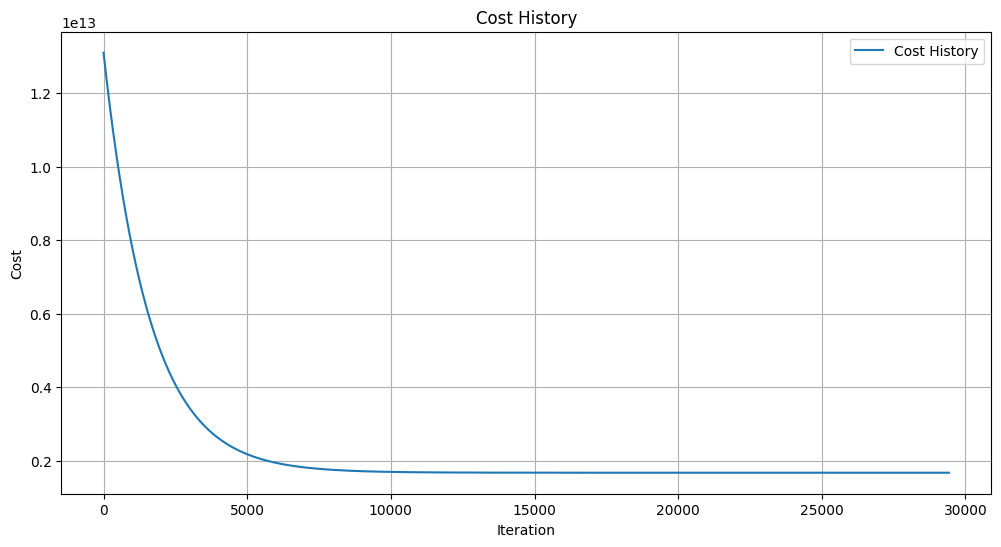

In [12]:
plt.figure(figsize=(12, 6))

plt.plot(cost_history, label='Cost History')
plt.title('Cost History')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()

plt.grid()
plt.show()

**After the first calculation:**

loss_function = 1673378175566.454

epsilon = 1000

**After the second calculation:**

loss_function = 1673380663699.3252

epsilon = 100